<a href="https://colab.research.google.com/github/gaws15/AINotebooksVault/blob/main/paper3_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu çalışmada sadece 1 katman görüntüsü(1920x1080pixel) 32 bloğa  ayrılmış ve her bloğun 32 özniteliği çıkarılmış ve bir excel dosyasına yazdırılmıştır.sonra bu tablo denetimsiz makine öğrenmesiyle bir sınıflandırma modeli geliştirilmiştir.
en önemli denetimsiz öğrenme algoritmaları:

1- K-Means Clustering

2- Hierarchical Clustering (Agglomerative)

3-DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

4- Gaussian Mixture Model (GMM)

5- OPTICS (Ordering Points To Identify the Clustering Structure)

 Bu çalışmada K-Means , DBSCAN , and GMM kullanılmıştır

Step 1: Load and Preprocess the Data

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the data, specifying the encoding
data = pd.read_excel('/content/sample.xlsx') # No need for sep or encoding for Excel files

# Display the first few rows
print(data.head())

# Drop non-feature columns (e.g., 'Sample')
features = data.drop(columns=['Sample'])

# Handle commas in numeric values (replace ',' with '.')
features = features.replace(',', '.', regex=True)

# Convert all feature columns to numeric
features = features.apply(pd.to_numeric, errors='coerce')

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

   Sample       Mean        Std     Variance    Average  Max  Min  median  \
0       1  76.641062  42.686328  1822.122640  76.641062  184    4      67   
1       2  39.399732  21.245652   451.377720  39.399732   97    1      36   
2       3  44.618672  26.958077   726.737938  44.618672  117    0      41   
3       4  56.843791  29.698745   882.015456  56.843791  113    0      58   
4       5  87.733259  44.033991  1938.992355  87.733259  186    8      84   

   ModeValue  frange  ...  magnitude_mean  magnitude_variance  magnitude_max  \
0         36     180  ...      646.043453        3.099278e+07         313654   
1         19      96  ...      474.654933        7.964090e+06         160981   
2         16     117  ...      582.018618        1.073488e+07         182423   
3         17     113  ...      582.175740        1.637705e+07         231934   
4         37     178  ...      736.290709        3.885247e+07         359343   

   phase_mean  phase_variance  hist_mean  hist_variance 

Step 2: Apply Clustering Algorithms


1--K-Means Clustering

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose the number of clusters
clusters_kmeans = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
data['Cluster_KMeans'] = clusters_kmeans

2--DBSCAN Clustering


In [39]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clusters_dbscan = dbscan.fit_predict(scaled_features)

# Add cluster labels to the dataframe
data['Cluster_DBSCAN'] = clusters_dbscan

3--Gaussian Mixture Model (GMM)

In [40]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)
clusters_gmm = gmm.fit_predict(scaled_features)

# Add cluster labels to the dataframe
data['Cluster_GMM'] = clusters_gmm

Step 3: Dimensionality Reduction for Visualization

2 yöntem var

1- PCA

2- t-SNE





PCA for Visualization


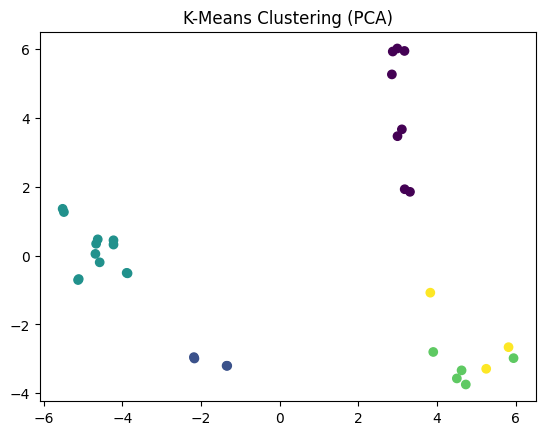

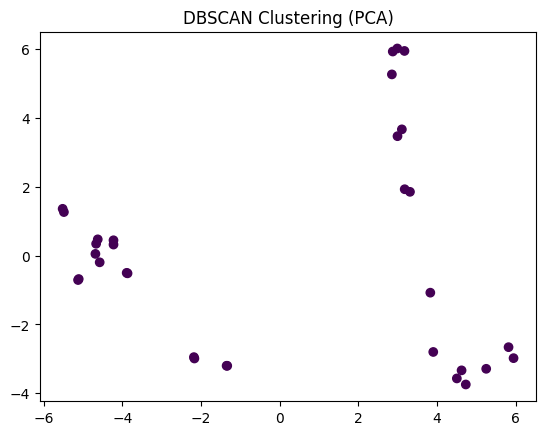

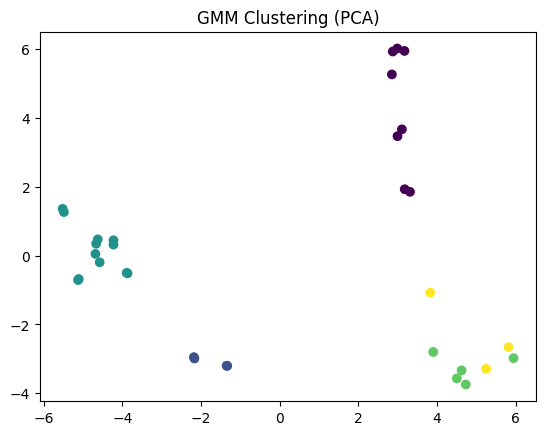

In [41]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_features_pca = pca.fit_transform(scaled_features)

# Plot K-Means clusters
plt.scatter(reduced_features_pca[:, 0], reduced_features_pca[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title('K-Means Clustering (PCA)')
plt.show()

# Plot DBSCAN clusters
plt.scatter(reduced_features_pca[:, 0], reduced_features_pca[:, 1], c=clusters_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering (PCA)')
plt.show()

# Plot GMM clusters
plt.scatter(reduced_features_pca[:, 0], reduced_features_pca[:, 1], c=clusters_gmm, cmap='viridis')
plt.title('GMM Clustering (PCA)')
plt.show()

t-SNE for Visualization


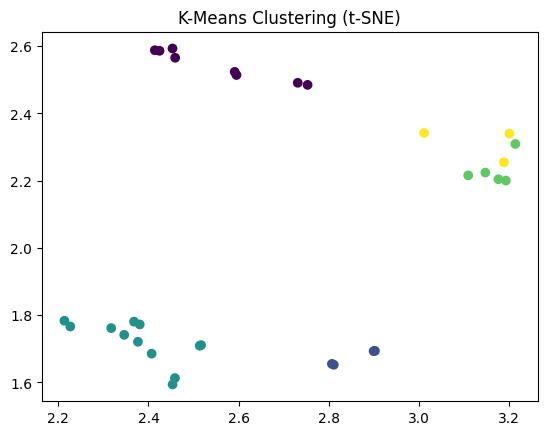

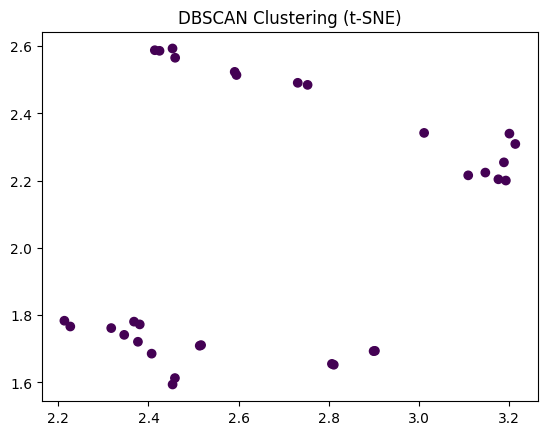

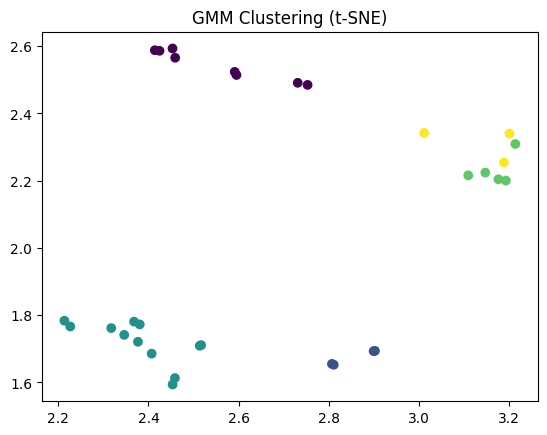

In [42]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
reduced_features_tsne = tsne.fit_transform(scaled_features)

# Plot K-Means clusters
plt.scatter(reduced_features_tsne[:, 0], reduced_features_tsne[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title('K-Means Clustering (t-SNE)')
plt.show()

# Plot DBSCAN clusters
plt.scatter(reduced_features_tsne[:, 0], reduced_features_tsne[:, 1], c=clusters_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering (t-SNE)')
plt.show()

# Plot GMM clusters
plt.scatter(reduced_features_tsne[:, 0], reduced_features_tsne[:, 1], c=clusters_gmm, cmap='viridis')
plt.title('GMM Clustering (t-SNE)')
plt.show()

In [43]:
# Save the results to a new Excel file
data.to_excel('clustered_blocks.xlsx', index=False)

MEASURE FEATURE PERFORMANCES AND THEN ELIMINATE

This process is often referred to as feature importance analysis or feature selection . Since you're working with unsupervised learning (clustering), traditional supervised methods like feature importance from decision trees won't apply directly. However, there are several techniques you can use to determine the influence of each feature on the clustering results:

BUNUN İÇİN BİR ÇOK YÖNTEM VAR:
1- Variance-Based Feature Importance
2- Principal Component Analysis (PCA)
3- Clustering Performance with Feature Ablation
4- Correlation with Cluster Labels


3. Clustering Performance with Feature Ablation

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardize the features
scaled_features = scaler.fit_transform(features)

# Compute baseline Silhouette Score
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(scaled_features)
baseline_score = silhouette_score(scaled_features, labels)

# Evaluate feature importance by ablation
feature_importance = {}
for col in features.columns:
    # Drop one feature at a time
    reduced_features = features.drop(columns=[col])
    scaled_reduced_features = scaler.fit_transform(reduced_features)

    # Compute Silhouette Score without the feature
    labels_reduced = kmeans.fit_predict(scaled_reduced_features)
    score_reduced = silhouette_score(scaled_reduced_features, labels_reduced)

    # Measure the drop in score
    feature_importance[col] = baseline_score - score_reduced

# Sort features by importance
sorted_importance = pd.Series(feature_importance).sort_values(ascending=False)
print("Feature Importance (Based on Silhouette Score Drop):")
print(sorted_importance)

Feature Importance (Based on Silhouette Score Drop):
correlation           0.122788
kurtosis              0.111055
contrass              0.103546
Dissimilarity         0.103497
homogeneity           0.103487
Max                   0.012002
hist_entropy          0.011560
frange                0.011339
Entropy               0.010542
Std                   0.009260
Variance              0.008155
hist_variance         0.007088
magnitude_mean        0.006260
hist_skewness         0.002018
Min                   0.001871
magnitude_max         0.001424
Mean                  0.001401
Average               0.001401
magnitude_variance    0.000636
hist_mean             0.000000
energy               -0.007369
ASM1                 -0.008202
hist_kurtosis        -0.018006
phase_variance       -0.019636
CofMassy             -0.020340
CofMassx             -0.020363
ModeValue            -0.020486
Hmean                -0.021195
median               -0.022041
Gmean                -0.022927
Skewness         

In [45]:
import pandas as pd

# Load the data

# Drop non-feature columns (e.g., 'Sample')
features = data.drop(columns=['Sample'])

# Replace commas with dots and convert to numeric
features = features.replace(',', '.', regex=True)
features = features.apply(pd.to_numeric, errors='coerce')

# Calculate variance for each feature
feature_variances = features.var()

# Sort features by variance
sorted_variances = feature_variances.sort_values(ascending=False)

print("Feature Variances (Sorted):")
print(sorted_variances)

Feature Variances (Sorted):
magnitude_variance    6.353617e+14
magnitude_max         1.772343e+10
Variance              8.993780e+05
magnitude_mean        4.091063e+04
CofMassy              1.998931e+04
CofMassx              1.416434e+04
ModeValue             4.259032e+03
frange                2.132031e+03
Max                   1.814805e+03
Gmean                 1.547483e+03
median                1.293935e+03
Hmean                 1.213497e+03
Average               1.057066e+03
Mean                  1.057066e+03
Min                   4.523185e+02
Std                   1.392585e+02
Cluster_KMeans        1.628024e+00
Cluster_GMM           1.628024e+00
hist_kurtosis         1.316539e+00
hist_skewness         3.055485e-01
hist_entropy          2.305207e-01
phase_variance        1.552709e-01
Skewness              1.212478e-01
Entropy               1.121302e-01
kurtosis              6.794672e-02
contrass              7.605707e-03
Dissimilarity         7.529596e-03
homogeneity           1.878

CLASSIFICATION PART

TO draw decision boundaries or functions that separate clusters in your data. These boundaries are typically used in classification tasks to visually separate different classes or clusters in a 2D or 3D space. However, since clustering is an unsupervised learning technique, the decision boundaries are not explicitly learned by the algorithm. Instead, we can approximate these boundaries based on the cluster assignments.


STEP 1. Reduce Dimensionality for Visualization

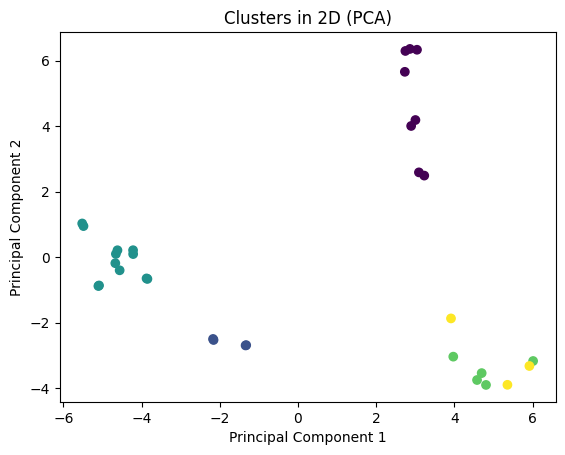

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot the reduced data
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title('Clusters in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


STEP2. Train a Classifier to Approximate Decision Boundaries

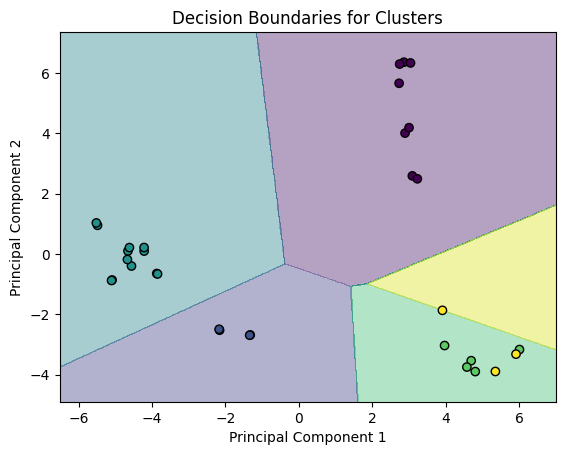

In [56]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Train a logistic regression model on the reduced features
classifier = LogisticRegression()
classifier.fit(reduced_features, clusters_kmeans)

# Create a mesh grid to plot decision boundaries
x_min, x_max = reduced_features[:, 0].min() - 1, reduced_features[:, 0].max() + 1
y_min, y_max = reduced_features[:, 1].min() - 1, reduced_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the mesh grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters_kmeans, edgecolor='k', cmap='viridis')
plt.title('Decision Boundaries for Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


STEP3. Use Kernel Methods for Non-Linear Boundaries



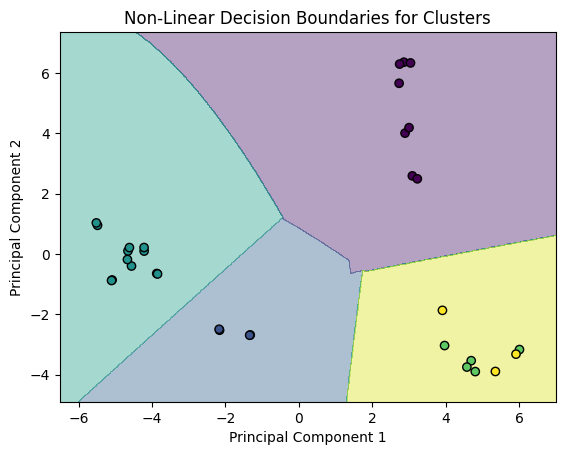

In [57]:
from sklearn.svm import SVC

# Train an SVM with RBF kernel
svm = SVC(kernel='rbf', gamma='scale', C=1.0)
svm.fit(reduced_features, clusters_kmeans)

# Predict the class for each point in the mesh grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters_kmeans, edgecolor='k', cmap='viridis')
plt.title('Non-Linear Decision Boundaries for Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

STEP4. Use GMM for Probabilistic Boundaries


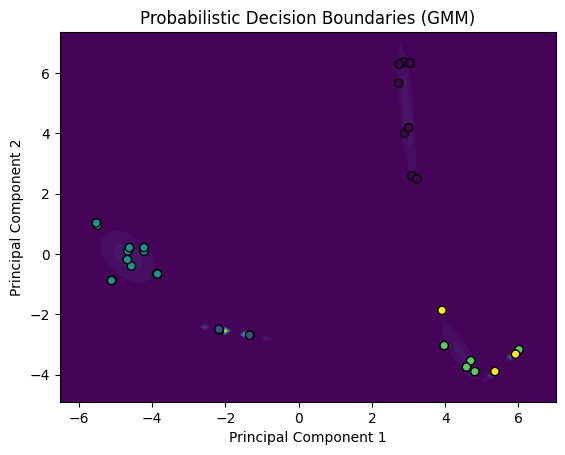

In [60]:
from sklearn.mixture import GaussianMixture

# Fit a GMM to the data
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(reduced_features)

# Generate a grid of points
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Compute the log probabilities for each point
log_probs = gmm.score_samples(grid_points)
probs = np.exp(log_probs).reshape(xx.shape)

# Plot the probabilistic boundaries
plt.contourf(xx, yy, probs, levels=50, cmap='viridis')
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters_kmeans, edgecolor='k', cmap='viridis')
plt.title('Probabilistic Decision Boundaries (GMM)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

PREDICTION PART RANDOM AN INPUT BLOCK AND GIVE A PREDICTION

RANDOM INPUT GENERATION

In [61]:
# Create a new random sample (ensure the values are within the range of the dataset)
random_sample = pd.DataFrame({
    'Mean': [80],
    'Std': [40],
    'Variance': [1800],
    'Average': [80],
    'Max': [180],
    'Min': [5],
    'median': [70],
    'ModeValue': [40],
    'frange': [175],
    'Skewness': [0.5],
    'kurtosis': [-1.0],
    'Entropy': [5.0],
    'CofMassx': [250],
    'CofMassy': [300],
    'Hmean': [60],
    'Gmean': [70],
    'contrass': [0.04],
    'Dissimilarity': [0.04],
    'homogeneity': [0.98],
    'energy': [0.4],
    'correlation': [0.99],
    'ASM1': [0.16],
    'magnitude_mean': [700],
    'magnitude_variance': [30000000],
    'magnitude_max': [300000],
    'phase_mean': [0.0015],
    'phase_variance': [3.0],
    'hist_mean': [0.004],
    'hist_variance': [0.00001],
    'hist_skewness': [1.0],
    'hist_kurtosis': [-0.5],
    'hist_entropy': [7.0]
})
print("Manually Created Random Sample:")
print(random_sample)

Manually Created Random Sample:
   Mean  Std  Variance  Average  Max  Min  median  ModeValue  frange  \
0    80   40      1800       80  180    5      70         40     175   

   Skewness  ...  magnitude_mean  magnitude_variance  magnitude_max  \
0       0.5  ...             700            30000000         300000   

   phase_mean  phase_variance  hist_mean  hist_variance  hist_skewness  \
0      0.0015             3.0      0.004        0.00001            1.0   

   hist_kurtosis  hist_entropy  
0           -0.5           7.0  

[1 rows x 32 columns]


Random Sample:
          Mean        Std     Variance     Average  Max  Min  median  \
29  114.013889  54.241915  2942.185363  114.013889  217    2     116   

    ModeValue  frange  Skewness  ...  phase_variance  hist_mean  \
29        170     215 -0.294589  ...        3.773793   0.003906   

    hist_variance  hist_skewness  hist_kurtosis  hist_entropy  Cluster_KMeans  \
29       0.000008      -0.085478      -1.218792      7.484202               3   

    Cluster_DBSCAN  Cluster_GMM  Cluster  
29              -1            3        3  

[1 rows x 36 columns]
Predicted Cluster: 3
Predicted Cluster: 3


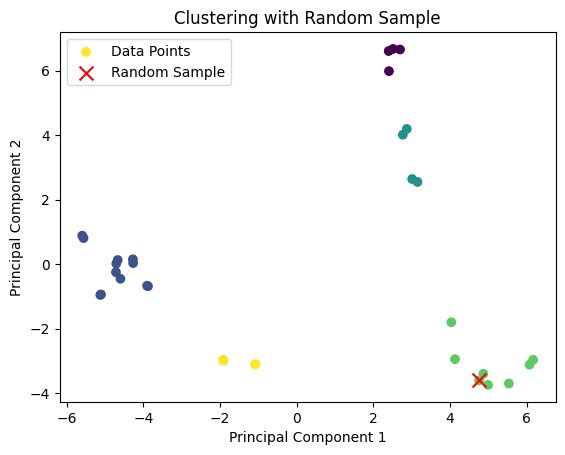

Random Sample Details:
          Mean        Std     Variance     Average  Max  Min  median  \
29  114.013889  54.241915  2942.185363  114.013889  217    2     116   

    ModeValue  frange  Skewness  ...  phase_variance  hist_mean  \
29        170     215 -0.294589  ...        3.773793   0.003906   

    hist_variance  hist_skewness  hist_kurtosis  hist_entropy  Cluster_KMeans  \
29       0.000008      -0.085478      -1.218792      7.484202               3   

    Cluster_DBSCAN  Cluster_GMM  Cluster  
29              -1            3        3  

[1 rows x 36 columns]
Predicted Cluster: 3


In [62]:
# Replace commas with dots and convert to numeric
data = data.replace(',', '.', regex=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Separate features (drop non-feature columns like 'Sample')
features = data.drop(columns=['Sample'])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

######################################################################3

from sklearn.cluster import KMeans

# Train a K-Means clustering model
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
data['Cluster'] = clusters

######################################################################3

# Randomly select a sample from the dataset
random_sample = features.sample(n=1, random_state=42)
print("Random Sample:")
print(random_sample)

######################################################################3
# Scale the random sample using the same scaler
scaled_random_sample = scaler.transform(random_sample)

# Predict the cluster for the random sample
predicted_cluster = kmeans.predict(scaled_random_sample)
print(f"Predicted Cluster: {predicted_cluster[0]}")
######################################################################3

# Scale the random sample using the same scaler
scaled_random_sample = scaler.transform(random_sample)

# Predict the cluster for the random sample
predicted_cluster = kmeans.predict(scaled_random_sample)
print(f"Predicted Cluster: {predicted_cluster[0]}")

######################################################################3


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Reduce the random sample to 2D
reduced_random_sample = pca.transform(scaled_random_sample)

# Plot the clusters and the random sample
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', label='Data Points')
plt.scatter(reduced_random_sample[:, 0], reduced_random_sample[:, 1], c='red', marker='x', s=100, label='Random Sample')
plt.title('Clustering with Random Sample')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

######################################################################3
# Print the random sample and its predicted cluster
print("Random Sample Details:")
print(random_sample)
print(f"Predicted Cluster: {predicted_cluster[0]}")









neural network part #3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 32.0646 - mae: 5.6378 - val_loss: 33.3246 - val_mae: 5.7305
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 30.3715 - mae: 5.4900 - val_loss: 31.7999 - val_mae: 5.6019
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 28.8231 - mae: 5.3510 - val_loss: 30.3741 - val_mae: 5.4785
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 27.4296 - mae: 5.2228 - val_loss: 29.0008 - val_mae: 5.3571
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 26.1191 - mae: 5.0988 - val_loss: 27.7108 - val_mae: 5.2404
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 24.9554 - mae: 4.9859 - val_loss: 26.6317 - val_mae: 5.1410
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 23.9788 - mae: 4.8885 - val_loss: 25.6010 - val_mae: 5.0445
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 23.1671 - mae: 4.8056 - val_loss: 24.6698 - val_mae: 4.9553
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 22.4365

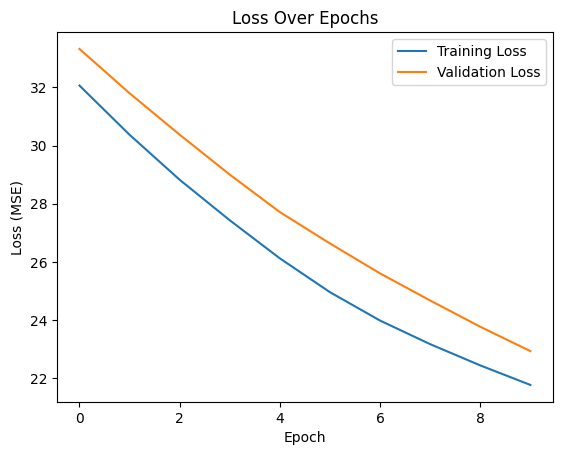

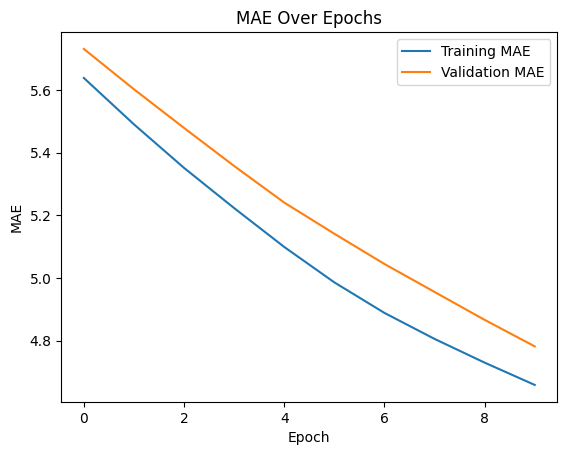

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


      Actual  Predicted
29  5.236547   0.480424
15  4.378916  -0.158037
24  5.174684   0.002445
17  4.351921  -0.045975
8   4.788358  -0.155489


In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
# Load the data, specifying the encoding
data = pd.read_excel('/content/sample.xlsx') # No need for sep or encoding for Excel files

# Replace commas with dots and convert to numeric
data = data.replace(',', '.', regex=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Separate features (X) and target (y)
# For this example, let's assume we're predicting 'Entropy' as the target variable
X = data.drop(columns=['Sample', 'Entropy'])  # Features
y = data['Entropy']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(16, activation='relu'),  # Another hidden layer
    Dense(1)  # Output layer (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
model.summary()



# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=10,            # Number of training iterations
    batch_size=32,         # Number of samples per gradient update
    verbose=1              # Display progress during training
)




# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")


import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Compare actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(comparison.head())


# Save the model
model.save('neural_network_model.h5')

# Load the model
#from tensorflow.keras.models import load_model
#loaded_model = load_model('neural_network_model.h5')


nnet classification

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the data, specifying the encoding
data = pd.read_excel('/content/clustered_blocks.xlsx') # No need for sep or encoding for Excel files

# Replace commas with dots and convert to numeric
data = data.replace(',', '.', regex=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Separate features (X) and target (y)
# Assume 'Cluster' column contains the cluster labels from K-Means clustering
X = data.drop(columns=[])  # Features
y = data['Cluster_KMeans']  # Target (cluster labels)

# Encode the target variable as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert to one-hot encoding for multi-class classification
y_categorical = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(16, activation='relu'),  # Another hidden layer
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer (softmax for classification)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,061 (19.77 KB)

 Trainable params: 5,061 (19.77 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=10,            # Number of training iterations
    batch_size=32,         # Number of samples per gradient update
    verbose=1              # Display progress during training
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2000 - loss: 1.5926 - val_accuracy: 0.6000 - val_loss: 1.5874
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.2000 - loss: 1.5303 - val_accuracy: 0.6000 - val_loss: 1.5350
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.3000 - loss: 1.4747 - val_accuracy: 0.6000 - val_loss: 1.4818
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5500 - loss: 1.4235 - val_accuracy: 0.6000 - val_loss: 1.4315
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.6500 - loss: 1.3757 - val_accuracy: 0.8000 - val_loss: 1.3854
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.6500 - loss: 1.3317 - val_accuracy: 0.8000 - val_loss: 1.3413
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.7000 - loss: 1.2889 - val_accuracy: 0.8000 - val_loss: 1.2964
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.7000 - loss: 1.2474 - val_accuracy: 0.8000 - val_loss: 1.

In [74]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.8942
Test Loss: 0.894204318523407
Test Accuracy: 1.0


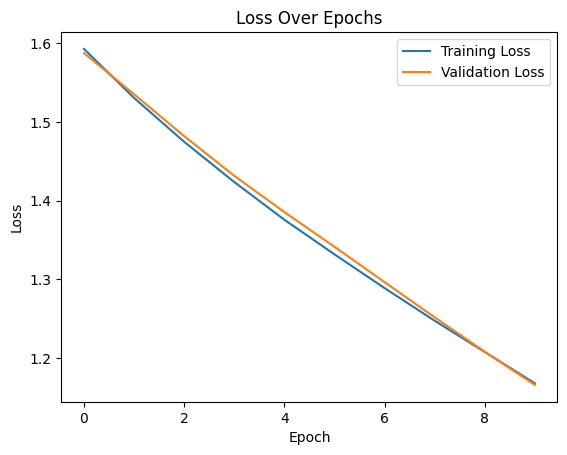

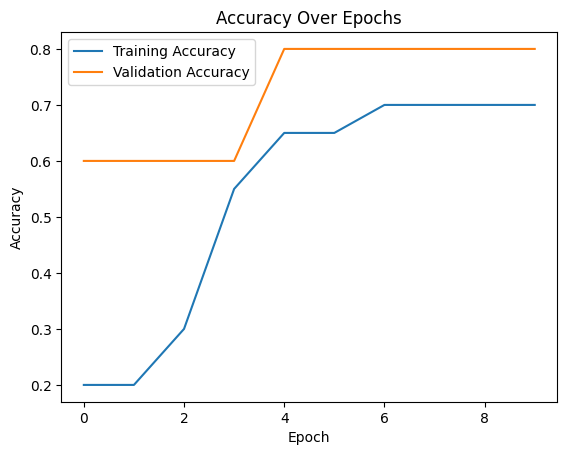

In [75]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [76]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compare actual vs predicted classes
comparison = pd.DataFrame({'Actual': y_true_classes, 'Predicted': y_pred_classes})
print(comparison.head())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
   Actual  Predicted
0       3          3
1       0          0
2       3          3
3       2          2
4       0          0
